## 2 -  Problem Statement

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.
- You would like to expand your business to cities that may give your restaurant higher profits.
- The chain already has restaurants in various cities and you have data for profits and populations from the cities.
- You also have data on cities that are candidates for a new restaurant. 
    - For these cities, you have the city population.
    
Can you use the data to help you identify which cities may potentially give your business higher profits?

## 3 - Dataset

You will start by loading the dataset for this task. 
- The data has two columns, first is the population of the city in 10,000 and second is the profit in $10,000

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

In [2]:
def load_data():
    data = np.loadtxt('ex1data1.txt',delimiter=',')
    X = data[:,0]
    y = data[:,1]
    return X,y


Type of x_train is <class 'numpy.ndarray'>
Type of y_train is <class 'numpy.ndarray'>

Shape of x_train is (97,)
Shape of y_train is (97,)

# of training set = 97

First few elements of 
x_train is [6.1101 5.5277 8.5186 7.0032 5.8598]
y_train is [17.592   9.1302 13.662  11.854   6.8233]


Text(0.5, 1.0, 'Population v.s. profit')

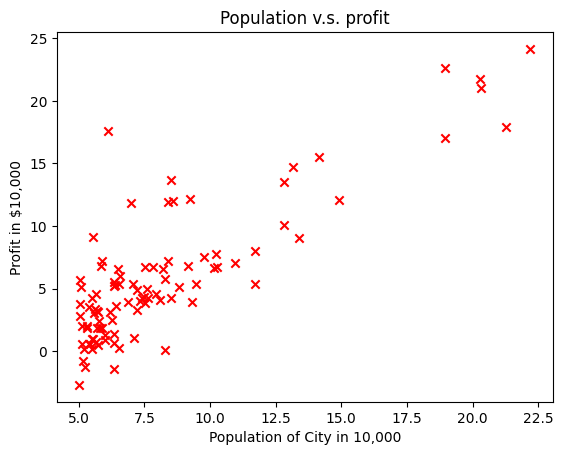

In [3]:
x_train, y_train = load_data()
print(f"Type of x_train is {type(x_train)}\nType of y_train is {type(y_train)}\n")
print(f"Shape of x_train is {x_train.shape}\nShape of y_train is {y_train.shape}\n")
print(f"# of training set = {len(y_train)}\n")
print(f"First few elements of \nx_train is {x_train[:5]}\ny_train is {y_train[:5]}")
plt.scatter(x_train, y_train, marker= 'x', c='r')
plt.xlabel('Population of City in 10,000')
plt.ylabel('Profit in $10,000')
plt.title('Population v.s. profit')

In [4]:
def compute_cost(x,y,w,b):
    m=x.shape[0]
    total_cost = 0
    for i in range(m):
        cost = (x[i]*w+b - y[i])**2
        total_cost+=cost
    total_cost = total_cost/(2*m)
    return total_cost

# TEST
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(f"Cost = {cost}")

from public_tests import *
compute_cost_test(compute_cost)

Cost = 75.20338497891959
All tests passed!


In [5]:
def compute_gradient(x, y, w, b):
    m=x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        pred = w*x[i] + b
        dj_db += pred - y[i]
        dj_dw += (pred - y[i]) * x[i]
    dj_db = dj_db/m
    dj_dw = dj_dw/m
    return dj_dw, dj_db

In [6]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114435 -4.007175051546391


In [7]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m = len(x)
    J_history = []
    w_history = []
    b = b_in
    w = copy.deepcopy(w_in)
    for i in range(num_iters):
        dj_dw , dj_db = gradient_function(x, y, w, b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        cost = cost_function(x, y, w, b)
        J_history.append(cost)
        if i%np.round(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e}")
    return w, b, J_history, w_history

In [8]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iter = 15000
alpha = 0.01

w,b,_,_ = gradient_descent(x_train, y_train, initial_w, initial_b, compute_cost,compute_gradient, alpha, iter)
print("w,b found by gradient descent:",w,b)

Iteration    0: Cost 6.74e+00
Iteration 1500: Cost 4.48e+00
Iteration 3000: Cost 4.48e+00
Iteration 4500: Cost 4.48e+00
Iteration 6000: Cost 4.48e+00
Iteration 7500: Cost 4.48e+00
Iteration 9000: Cost 4.48e+00
Iteration 10500: Cost 4.48e+00
Iteration 12000: Cost 4.48e+00
Iteration 13500: Cost 4.48e+00
w,b found by gradient descent: 1.1930336441888891 -3.8957808783048415


For population = 35,000, we predict a profit of $2798.37
For population = 70,000, we predict a profit of $44554.55


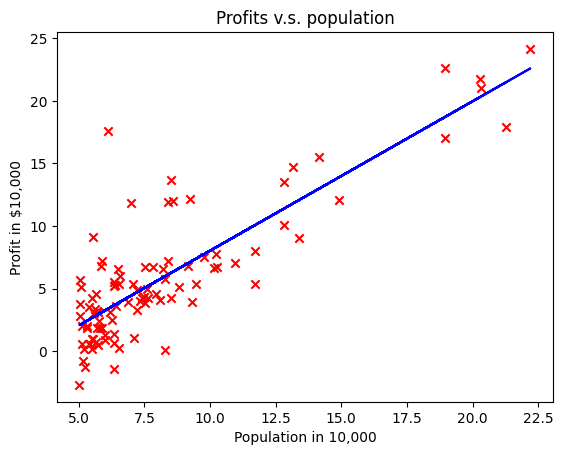

In [9]:
# plot model's results
m = x_train.shape[0]
predictions = np.zeros(m)
for i in range(m):
    predictions[i]=w*x_train[i]+b

predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

plt.plot(x_train, predictions, c='b')
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Profits v.s. population")
plt.xlabel("Population in 10,000")
plt.ylabel('Profit in $10,000');